# Import Library & Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [54]:
raw_data = pd.read_csv('DataFolder/trainset.csv')
raw_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


# Data Cleaning Process

In [55]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29271 non-null  object 
 2   marital      29271 non-null  object 
 3   education    29271 non-null  object 
 4   housing      29271 non-null  object 
 5   loan         29271 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [56]:
# covert unknown Data to np.Nan
raw_data = raw_data.replace('unknown',np.nan)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29271 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          29271 non-null  int64  
 1   job          29011 non-null  object 
 2   marital      29220 non-null  object 
 3   education    28044 non-null  object 
 4   housing      28558 non-null  object 
 5   loan         28558 non-null  object 
 6   contact      29271 non-null  object 
 7   month        29271 non-null  object 
 8   day_of_week  29271 non-null  object 
 9   duration     29271 non-null  int64  
 10  campaign     29271 non-null  int64  
 11  pdays        29271 non-null  int64  
 12  poutcome     29271 non-null  object 
 13  nr.employed  29271 non-null  float64
 14  Subscribed   29271 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [57]:
# Check Empty Data
raw_data["job"].unique()
raw_data.isna().sum()

age               0
job             260
marital          51
education      1227
housing         713
loan            713
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
poutcome          0
nr.employed       0
Subscribed        0
dtype: int64

In [58]:
#Check no of unknown
raw_data = raw_data.dropna(subset=["job","marital","education","housing","loan"])
raw_data.isna().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
nr.employed    0
Subscribed     0
dtype: int64

In [59]:
#Data drop is around 7%. The remaining dataset is as follow
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27178 entries, 0 to 29270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          27178 non-null  int64  
 1   job          27178 non-null  object 
 2   marital      27178 non-null  object 
 3   education    27178 non-null  object 
 4   housing      27178 non-null  object 
 5   loan         27178 non-null  object 
 6   contact      27178 non-null  object 
 7   month        27178 non-null  object 
 8   day_of_week  27178 non-null  object 
 9   duration     27178 non-null  int64  
 10  campaign     27178 non-null  int64  
 11  pdays        27178 non-null  int64  
 12  poutcome     27178 non-null  object 
 13  nr.employed  27178 non-null  float64
 14  Subscribed   27178 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [60]:
#Ratio on Subscribed
ratio =  (raw_data['Subscribed'].value_counts()['no']/raw_data['Subscribed'].value_counts().sum())*100
ratio

89.07204356464787

In [61]:
#CheckPoint
check_point = raw_data.copy()

# Data Visualization


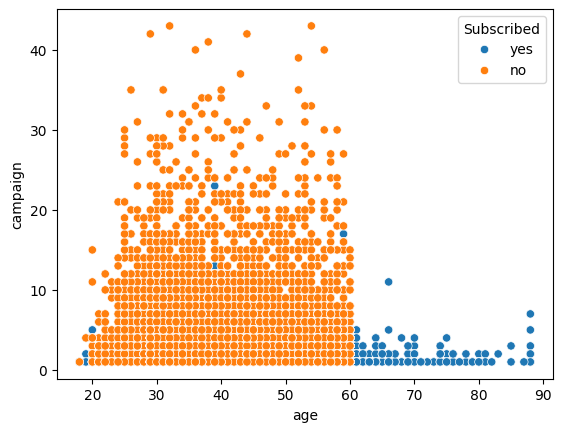

In [ ]:
sns.scatterplot(data = raw_data ,x='age',y='campaign',hue='Subscribed')
plt.show()

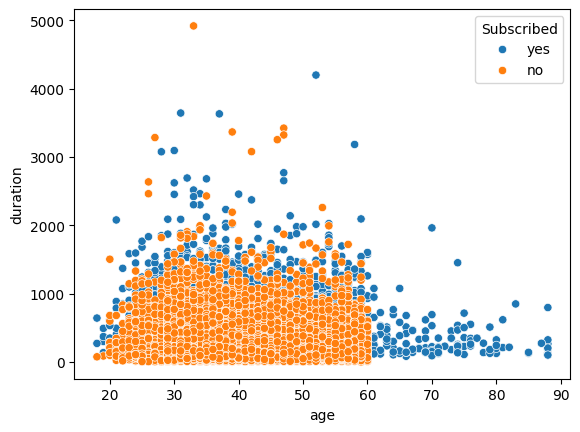

In [ ]:
sns.scatterplot(data = raw_data , x='age', y='duration', hue='Subscribed')
plt.show()

In [ ]:
#Observe the pattern of the age above 60 years old
raw_data[raw_data['age']>60].sort_values('Subscribed')

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
1348,70,retired,divorced,basic.4y,yes,no,cellular,mar,mon,187,3,999,nonexistent,5099.1,yes
2980,62,admin.,married,university.degree,yes,no,cellular,aug,fri,116,1,999,nonexistent,5076.2,yes
2975,87,retired,divorced,basic.4y,no,no,cellular,aug,fri,273,1,999,nonexistent,5076.2,yes
2974,61,retired,married,basic.4y,yes,no,cellular,aug,fri,168,1,15,success,5076.2,yes
2973,61,retired,married,basic.4y,yes,yes,cellular,aug,fri,374,1,999,nonexistent,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,64,retired,married,university.degree,no,no,cellular,apr,tue,157,4,999,nonexistent,5099.1,yes
1722,85,retired,married,basic.4y,yes,no,cellular,apr,tue,129,3,999,nonexistent,5099.1,yes
1720,78,retired,married,basic.4y,yes,no,telephone,apr,tue,137,2,999,nonexistent,5099.1,yes
1923,65,management,married,university.degree,no,no,telephone,may,mon,1076,3,6,success,5099.1,yes
